##**Assignment RNN - LSTM**
###**Submitted By : Madhusudan Chandak**


I have used the same code provided by Applied AI and modified it to make changes to the RNN architecture and input data.


**Below are my learning/understanding forRecurrent Neural Networks (LSTMs)and the components which I have used in CNN assignments**

(Please correct or add if something is wrong or I am missing something)

**Recurrence (In this context)**: Ocurrence of same RNN layer in time dimension.


**RNN(Recurrent Neural Network)**: As in real life lot of things are only meaningful if they are sequential i.e one thing loses its meaning without context like a story, music or a video.
And normal MLP is not able to handle this style of human processing and RNN is inspired by this phenomenon only. In RNN the subsequent steps keeps the older sequential information intact, it do not loose all the previous information say intital words in sentence also affects the neuron handling words in later part of the sentence. Each RNN cell unfolds itself in time dimension.

**Short Term Memory / Long term relationship:** In deep RNNs the impact of older inputs starts diminishing and in some scenarios that input may be important for a particular neuron ahead in the network. This is the problem if vanishing gradient. To overcome this long term relationship LSTMs and GRUs are being used.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving LSTMimage.png to LSTMimage.png


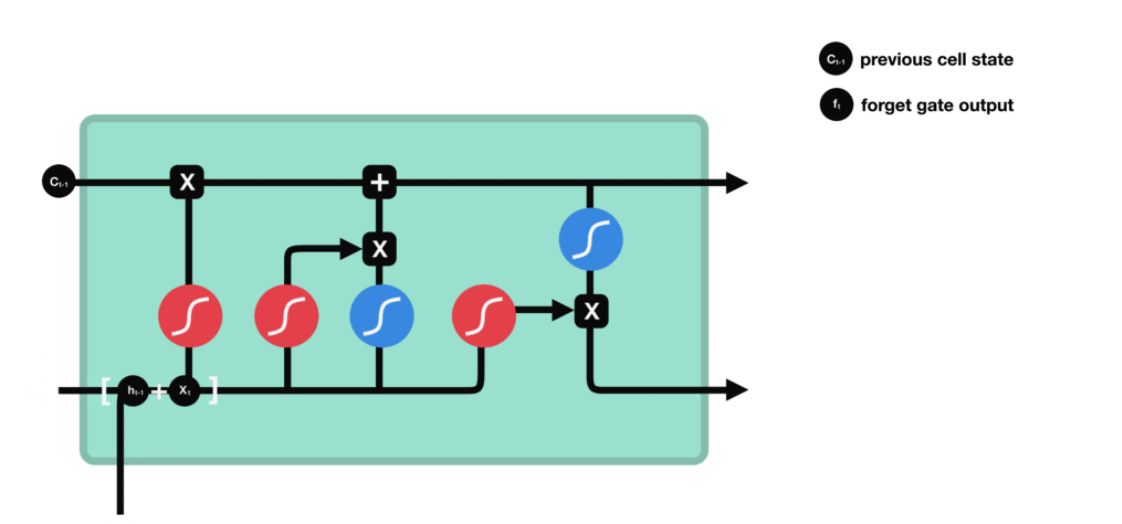

In [0]:
from IPython.display import Image , display
display(Image("LSTMimage.png",width=700, height=400))

***The above image is taken from "https://towardsdatascience.com".***

**Note:** The ones in red are sigmoid function and in blue are tanh functions.

**LSTM (Long Short Term Memory):**  It carries forward the cell state to deep in the network so that the information can be used by the subsequent neurons later in the architecture.
It has forget gate which decided how much cell state information to keep. It has input gate which decides how much hidden state and current input info to be passed. It has update gate that updates the hidden state.

Steps:

1. Combines previous hidden state(Ht-1) and curren input(Xt) (Concatenate funtion) i.e Ht-1+Xt

2. Forget Layer will remove non relavent data(cell state). Multiply cell state (Ct) with output of forget gate (sigmoid fn) so that only relevant cell state will continue forward.

3. Pass "Ht-1+Xt" to input gate (sigmoid layer).

4. Pass " Ht-1+Xt" to tanh layer.

5. Multiply sigmoid and tanh output to decide how much current information to be passed.

6. Add output of forget layer(relevant cell state) to the output of input gate i.e. (Step 5) to get the updated cell state.

7. Pass " Ht-1+Xt" to sigmoid function in update gate.

8. Pass updated cell state(Ct) to tanh function.

9. Multiply Output of above sigmoid fn (Ht-1 + Xt) and Tanh (Ct) function to get the updated hidden state to be passed to next cell.

10. Updated cell state(Ct) and hidden state(Ht) are carried forward in next cell.

*This I figured out from different blogs such as colah, https://towardsdatascience.com etc.
Please verify*.

**GRU (Gated Recurrent Units): ** As the LSTM cell was a bit complex the GRUs are a simpler and modern version of LSTM. These have only 2 gates Reset And Update gate so reducing the computations and improving the speed without much compromising with the accuracy.
Reset gate decides how much past information to keep and the Update gate decides what current information to be passed to subsequent cells and what not to be passed.

**Bidirectional RNN**: As in few cases the output of a particular neuron can be dependent upon the previous and the subsequent inputs. So Bidirectional RNN takes input from both the directions and concatenates the outputs of both forward and backward cell to handle the output dimension of the RNN layer.

In [0]:
# LSTM for sequence classification in the Amazon Fine Food Reviews dataset
import numpy 
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import text_to_word_sequence

# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [0]:
#Mounting Google Drive to load the Amazon dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Checking for the data availability
!ls '/content/drive/My Drive/Colab Notebooks/final.sqlite'

'/content/drive/My Drive/Colab Notebooks/final.sqlite'


In [0]:
#Connecting to the database and retriving data
conn = sqlite3.connect('/content/drive/My Drive/Colab Notebooks/final.sqlite')
final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score !=3""", conn)
conn.close()


In [0]:
#Sorting on the basis of time
final.sort_values('Time')

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
30,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
424,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
330,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
423,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...
245,346116,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,positive,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,one movi movi collect fill comedi action whate...
308,346041,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,negative,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",alway enjoy movi funni entertain didnt hesit p...
215,70688,76882,B00002N8SM,A32DW342WBJ6BX,Buttersugar,0,0,positive,948672000,A sure death for flies,I bought a few of these after my apartment was...,bought apart infest fruit fli hour trap mani f...
261,346141,374450,B00004CI84,ACJR7EQF9S6FP,Jeremy Robertson,2,3,positive,951523200,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...,happen say name three time michael keaten star...
325,346094,374400,B00004CI84,A2DEE7F9XKP3ZR,jerome,0,3,positive,959990400,Research - Beatlejuice video - French version,I'm getting crazy.I'm looking for Beatlejuice ...,get crazi look beatlejuic french version video...


In [0]:
print(final.shape)
final = final[:60000] #Taking 60000 datapoints
print(len(final))

(364171, 12)
60000


In [0]:
#Converting test data into binary i.e. 1 and 0
def categorical(x):
    if x == "positive":
        return 1
    else:
        return 0 
    
final['Score'] = final['Score'].map(categorical)

In [0]:
x = final['CleanedText'].values
y = final['Score']

In [0]:
print(y[0])

1


In [0]:
print(x[0])
print(len(x[0]))

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
195


In [0]:
#Training data and test data split 75:25 train:test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

In [0]:
#Shapes of the data after divide
print("Shape of train data",np.shape(X_train))
print("Shape of test data :",np.shape(X_test))
print("Shape of Train score :",np.shape(Y_train))
print("Shape of Test score :",np.shape(Y_test))

Shape of train data (45000,)
Shape of test data : (15000,)
Shape of Train score : (45000,)
Shape of Test score : (15000,)


In [0]:
#Tokenizing the corpus on the basis of counts using Keras preprocessing library
#Only top 5000 words taken
t = Tokenizer(num_words=5000)
t.fit_on_texts(X_train)

In [0]:
#Reference from below link
#https://faroit.github.io/keras-docs/1.2.2/preprocessing/text/
#Convering test to sequences 
X_trains = t.texts_to_sequences(X_train)
X_tests = t.texts_to_sequences(X_test)

In [0]:
#Sample datapoint
print(X_trains[0])
print(np.shape(X_trains))
print(np.shape(X_trains[0]))

[11, 270, 54, 631, 118, 27, 1040, 218, 428, 609, 186, 178, 118, 645, 273, 63, 274, 12, 91, 59, 426, 33, 341, 59, 1225, 2279, 51, 390, 2946, 5, 609, 2458, 2, 115, 319, 54]
(45000,)
(36,)


In [0]:
#Referred from LSTM notebook by Applied AI
max_review_length = 600
X_trains = sequence.pad_sequences(X_trains, maxlen=max_review_length)
X_tests = sequence.pad_sequences(X_tests, maxlen=max_review_length)

print(np.shape(X_trains))
print(X_trains[0])

(45000, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

### Using the LSTM Code for Amazon Fine Food Data

In [0]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(5000, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.fit(X_trains, Y_train, nb_epoch=10, batch_size=64,validation_data=(X_tests, Y_test))
# Final evaluation of the model
scores = model.evaluate(X_tests, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 832s 18ms/step - loss: 0.0746 - acc: 0.9748 - val_loss: 0.3122 - val_acc: 0.9070
Epoch 2/10
45000/45000 [==============================] - 841s 19ms/step - loss: 0.0629 - acc: 0.9798 - val_loss: 0.3514 - val_acc: 0.8916
Epoch 3/10
45000/45000 [==============================] - 843s 19ms/step - loss: 0.0543 - acc: 0.9828 - val_loss: 0.3957 - val_acc: 0.9065
Epoch 4/10
45000/45000 [==============================] - 838s 19ms/step - loss: 0.0520 - acc: 0.9838 - val_loss: 0.3863 - val_acc: 0.9036
Epoch 5/10
45000/45000 [==============================] - 891s 20ms/step - loss: 0.0416 - acc: 0.9868 - val_loss: 0.4294 - val_acc: 0.9028
Epoch 6/10
45000/45000 [==============================] - 970s 22ms/step - loss: 0.0383 - acc: 0.9886 - val_loss: 0.4570 - val_acc: 0.9040
Epoch 7/10
45000/45000 [==============================] - 960s 21ms/step - loss: 0.0344 - acc: 0.9896 - val_loss: 0.

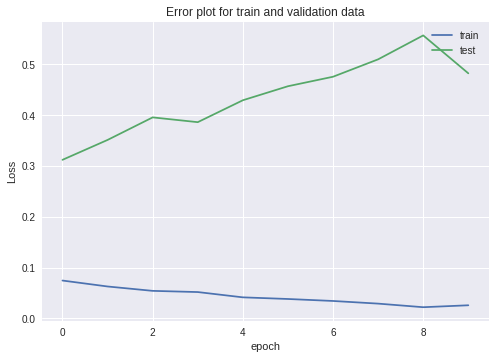

In [0]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Error plot for train and validation data')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
# Multiple layered LSTM implementation on Amazon fine Food reviews Dataset
embedding_vecor_length = 32
model2 = Sequential()
model2.add(Embedding(5000, embedding_vecor_length, input_length=max_review_length))
model2.add(LSTM(100, return_sequences=True)) #return sequences is true as it need to pass the sequences to the subsequent LSTM Layer
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 600, 100)          53200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 293,701
Trainable params: 293,701
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model2.fit(X_trains, Y_train, nb_epoch=10, batch_size=64,validation_data=(X_tests, Y_test))
# Final evaluation of the model
scores2 = model2.evaluate(X_tests, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores2[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 1910s 42ms/step - loss: 0.2657 - acc: 0.8961 - val_loss: 0.2086 - val_acc: 0.9175
Epoch 2/10
45000/45000 [==============================] - 1885s 42ms/step - loss: 0.1906 - acc: 0.9268 - val_loss: 0.2104 - val_acc: 0.9159
Epoch 3/10
45000/45000 [==============================] - 1897s 42ms/step - loss: 0.1700 - acc: 0.9350 - val_loss: 0.2144 - val_acc: 0.9177
Epoch 4/10
45000/45000 [==============================] - 1832s 41ms/step - loss: 0.1501 - acc: 0.9439 - val_loss: 0.2157 - val_acc: 0.9157
Epoch 5/10
45000/45000 [==============================] - 1715s 38ms/step - loss: 0.1316 - acc: 0.9524 - val_loss: 0.2284 - val_acc: 0.9160
Epoch 6/10
45000/45000 [==============================] - 1631s 36ms/step - loss: 0.1142 - acc: 0.9609 - val_loss: 0.2557 - val_acc: 0.9122
Epoch 7/10
45000/45000 [==============================] - 1578s 35ms/step - loss: 0.0960 - acc: 0.9682 - val_l

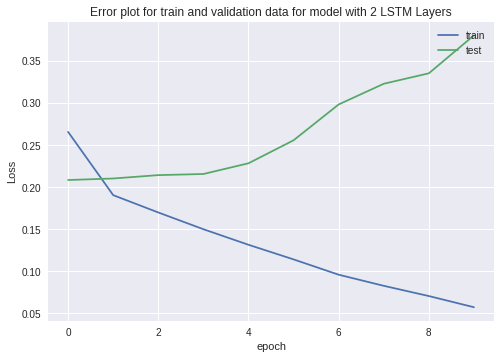

In [0]:
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('Error plot for train and validation data for model with 2 LSTM Layers')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

##Conclusion

With single layer of LSTM 89.75 % accuracy achieved.

With 2 layers of LSTM 90.07 % accuracy achieved.